# Minimization Animation Example

Small example of how Minuit tries to find the minimum in a parameter space. In this notebook we try to interactively fit a straight line (with no offset) to data while seeing what the $\chi^2$-value is. 

### Authors: 
- Christian Michelsen (Niels Bohr Institute)
- Troels Petersen (Niels Bohr Institute)

### Date:    
- 11-11-2022 (latest update)

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive   # Allows us to use interactive plotting capabilities in Jupyter Notebooks

We define the random seed and the true slope of the fit:

In [2]:
r = np.random
r.seed(42)

a_true = 1.5

We define the fitting function, a linear fit wit no offset, and a function which calculates the $\chi^2$-value. Both are one-liners, but is still used to get into the habit of rewriting code into smaller submodules that can be reused several times:

In [3]:
def linear(x, a):
    y = a*x
    return y

def calc_chi2(yhat, y, sy):
    chi2 = np.sum((yhat-y)**2 / sy**2)
    return chi2

We define the input data; `x` and `y` with gaussian errors added to them and the uncertainties of `y`, `sy`:

In [4]:
x = np.linspace(0, 5, 10) 
x += r.normal(0, 0.1, len(x))

y = linear(x, a_true)
y += r.normal(0, 0.5, len(y))

sy = 1 * np.ones_like(y)

Below is where the magic happens. We define `animate_linear_chi2_fit` to be a function which takes a single input, `p0`, and plots the line with this given slope together with the data points. It also plots the $\chi^2$-value as a function of `p0`. We input the function to the iPython widget `interactive` which we loaded initially and set the range of `p0` and finally we display it in the last line:

In [5]:
p0_list = []
chi2_list = [] 

In [6]:
def animate_linear_chi2_fit(p0=0):
    
    # Create empty figure with 2 subplots
    fig, ax = plt.subplots(ncols=2, figsize=(18, 8))

    # Calculate predicted y-values and chi2 given the current guess of p0
    yhat = linear(x, p0)
    chi2 = calc_chi2(yhat, y, sy)
    
    # Append the current value of p0 and chi2 to lists
    p0_list.append(p0)
    chi2_list.append(chi2)
    
    # Define an x- and y-axis (only 2 points are needed for linear case)
    xaxis = np.linspace(-1, 6, 2)
    yaxis = linear(xaxis, p0)
    
    # Plot the data, the linear function given p0:
    ax[0].errorbar(x, y, sy, fmt='.', label='Data Points')
    ax[0].plot(xaxis, yaxis, '-', label='Fit')
    ax[0].legend(loc='upper left');
    ax[0].set(xlim=(-1, 6), ylim=(-2, 10), xlabel='x', ylabel='y', title='Plot of data points and fit')
    
    # Plot the list of previous p0-values and chi2-values:
    ax[1].plot(p0_list, chi2_list, 'o', label='Chi2-values')
    ax[1].plot(p0, chi2, 'o', label='Current Chi2-value')
    ax[1].legend(loc='upper left');
    ax[1].text(1.5, 500, fr'$\chi^2 = {chi2:.1f}$', fontsize=14, ha='center')
    ax[1].set(xlim=(-2.1, 5.1), ylim=(-100, 1000), xlabel='p0', ylabel=r'$\chi^2$', title='Chi-square plot as a function of p0')

    fig.tight_layout()

interactive(children=(FloatSlider(value=0.0, description='p0', max=5.0, min=-2.0, step=0.02), Output()), _dom_…

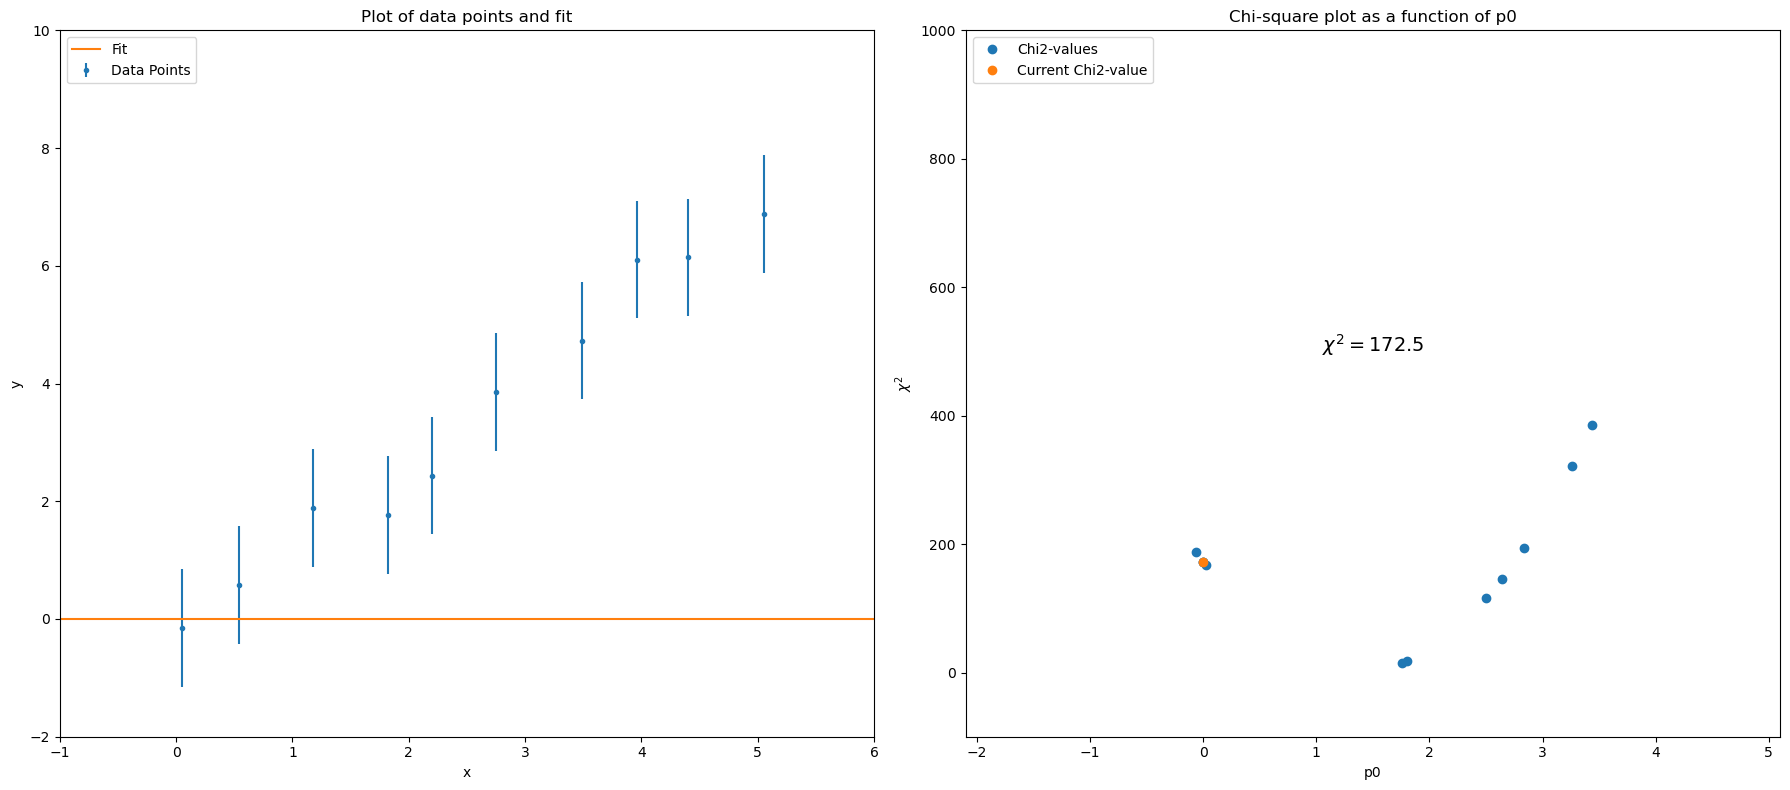

In [8]:
# Make the above function interactive with p0 given in the range from -2 to 5 in steps 0.02
interactive_plot = interactive(animate_linear_chi2_fit, p0=(-2.0, 5.0, 0.02))
interactive_plot

##### Observation:

Note how the $\chi^2$ value is minimal at about the correct value, and forms a parabola on either side of this best fit value. This is very general (for well behaved problems!), and the uncertainty on the fit parameter can be determined from this parabola (or the curve in general), as the uncertainty is the distance to the point, where the $\chi^2$ value has increased 1.

This is more complicated with several correlated variables, which is why we are happy to have a minimizer like Minuit, but in principle it is the same.